# Naive Bayes with BOW, TFIDF, Word2Vec, TFIDF weighted Word2Vec for Twitter US Airline Sentiment Analysis

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
sns.set_palette("dark")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec

In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold


In [4]:
twDF = pd.read_csv("Dataset/tweets_preprocessed.csv").drop(['Unnamed: 0'],axis=1)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text_clean
0,570306133677760513,0,NaN,Virgin America,dhepburn said
1,570301130888122368,0,NaN,Virgin America,plus added commercials experience tacky
2,570301083672813571,0,NaN,Virgin America,not today must mean need take another trip
3,570301031407624196,1,Bad Flight,Virgin America,really aggressive blast obnoxious entertainmen...
4,570300817074462722,1,Can't Tell,Virgin America,really big bad thing


In [5]:
twDF.shape

(14519, 5)

In [6]:
twDF["airline_sentiment"].value_counts()

1    9113
0    5406
Name: airline_sentiment, dtype: int64

It is an imbalanced dataset

In [7]:
twDF.loc[twDF['text_clean'].isnull()].shape

(0, 5)

In [8]:
#Removing records with Null values
twDF=twDF.loc[twDF['text_clean'].notnull()]

In [9]:
twDF.shape

(14519, 5)

In [10]:
# twDF.to_csv("Dataset/tweets_preprocessed.csv")

In [11]:
y = twDF['airline_sentiment'].values
X = twDF[['text_clean']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

## Naive Bayes with Bag of words 

In [94]:
# Getting BOW 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

vectorizer = CountVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text_clean'])
X_train_bow = vectorizer.transform(X_train['text_clean'].values)
X_test_bow = vectorizer.transform(X_test['text_clean'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

(10163, 1) (10163,)
(4356, 1) (4356,)
After vectorizations
(10163, 16254) (10163,)
(4356, 16254) (4356,)


In [95]:
X_train_bow.shape

(10163, 16254)

In [96]:
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

In [97]:
gnb = GaussianNB()
gnb.fit(X_train_bow, y_train)
pred = gnb.predict(X_test_bow)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_bow)
aucScoreBOW = roc_auc_score(y_test,  y_pred_prob[:,1])
fprBOW, tprBOW, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreBOW)
predT=gnb.predict(X_train_bow)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))


Confusion matrix
[[1223  399]
 [ 676 2058]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1622
           1       0.84      0.75      0.79      2734

    accuracy                           0.75      4356
   macro avg       0.74      0.75      0.74      4356
weighted avg       0.77      0.75      0.76      4356

AUC score for NB is  0.7533753158157269
Train Recall score for NB is  0.8998275591785546
Test Recall score for NB is  0.7527432333577176


**Observations:**

1.The test score of 0.7527 is fairly good

2.But the model is quite overfitting

## Naive Bayes with TFIDF

In [91]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)
vectorizer = TfidfVectorizer(min_df=2,ngram_range=(1,4))
vectorizer.fit(X_train['text_clean'])
X_train_tfidf = vectorizer.transform(X_train['text_clean'].values)
X_test_tfidf = vectorizer.transform(X_test['text_clean'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)


(10163, 1) (10163,)
(4356, 1) (4356,)
After vectorizations
(10163, 16254) (10163,)
(4356, 16254) (4356,)


In [92]:
X_train_tfidf=X_train_tfidf.toarray()
X_test_tfidf=X_test_tfidf.toarray()

In [93]:

gnb = GaussianNB()
gnb.fit(X_train_tfidf, y_train)
pred = gnb.predict(X_test_tfidf)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test_tfidf)
aucScoreTFIDF = roc_auc_score(y_test,  y_pred_prob[:,1])
fprTFIDF, tprTFIDF, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreTFIDF)
#print("Test Accuracy score for NB is ",accuracy_score(y_test, pred))
predT=gnb.predict(X_train_tfidf)
#print("Train Accuracy score for NB is ",accuracy_score(y_train, predT))
#print("Best parameters for NB are ",gnb.best_params_)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))

Confusion matrix
[[1203  419]
 [ 668 2066]]
              precision    recall  f1-score   support

           0       0.64      0.74      0.69      1622
           1       0.83      0.76      0.79      2734

    accuracy                           0.75      4356
   macro avg       0.74      0.75      0.74      4356
weighted avg       0.76      0.75      0.75      4356

AUC score for NB is  0.7486731454930694
Train Recall score for NB is  0.8998275591785546
Test Recall score for NB is  0.7556693489392831


**Observations:**

1.The test score of 0.7557 is fairly good

2.It is very close to result of BOW

3.This model is also quite overfitting

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes

## Modeling with Word2Vec

In [98]:
i=0
list_of_sentance=[]
for sentance in twDF['text_clean']:
    list_of_sentance.append(sentance.split())


w2v_model=Word2Vec(list_of_sentance,min_count=1,size=300, workers=4)
w2v_words = list(w2v_model.wv.vocab)

In [99]:
list_of_sentance[:3]

[['dhepburn', 'said'],
 ['plus', 'added', 'commercials', 'experience', 'tacky'],
 ['not', 'today', 'must', 'mean', 'need', 'take', 'another', 'trip']]

In [100]:
from tqdm import tqdm 
# average Word2Vec
# compute average word2vec for each tweet.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each tweet/sentence
    sent_vec = np.zeros(300)
    cnt_words =0; # num of words with a valid vector in the sentence/tweet
    for word in sent: # for each word in a tweet/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 14519/14519 [00:09<00:00, 1571.00it/s]


14519
300


In [101]:
X=np.array(sent_vectors)
y = twDF['airline_sentiment'].values
print("x shape=",X.shape,"  y shape=",y.shape)

x shape= (14519, 300)   y shape= (14519,)


In [102]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [103]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreWORD2VEC = roc_auc_score(y_test,  y_pred_prob[:,1])
fprWORD2VEC, tprWORD2VEC, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreWORD2VEC)
predT=gnb.predict(X_train)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))


Confusion matrix
[[ 693  929]
 [ 530 2204]]
              precision    recall  f1-score   support

           0       0.57      0.43      0.49      1622
           1       0.70      0.81      0.75      2734

    accuracy                           0.67      4356
   macro avg       0.64      0.62      0.62      4356
weighted avg       0.65      0.67      0.65      4356

AUC score for NB is  0.6471190524941888
Train Recall score for NB is  0.7976171813763913
Test Recall score for NB is  0.8061448427212875


**Observations:**

1.The test score of 0.8061 is better than BOW and TFIDF

2.But the model is not overfitting

3.But the AUC is not as good

# Modeling using TFIDF weighted word2vec

In [104]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(twDF['text_clean'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [105]:
# average Word2Vec
from tqdm import tqdm 

# compute average word2vec for each tweet.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/tweet is stored in this list
for sentence in tqdm(twDF['text_clean'].values): # for each tweet/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/tweet
    for word in sentence.split(): # for each word in a tweet/sentence
        if (word in w2v_words) and (word in tfidf_words):
            vec = w2v_model[word] # getting the vector for each word
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 14519/14519 [00:12<00:00, 1180.39it/s]


14519
300


In [106]:
X=np.array(tfidf_w2v_vectors)
y = twDF['airline_sentiment'].values
print("x shape=",X.shape,"  y shape=",y.shape)

x shape= (14519, 300)   y shape= (14519,)


In [107]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [108]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
accNB = accuracy_score(y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
aucScoreTFIDFWORD2VEC = roc_auc_score(y_test,  y_pred_prob[:,1])
fprTFIDFWORD2VEC, tprTFIDFWORD2VEC, thresholds = roc_curve(y_test, y_pred_prob[:,1] )
print("Confusion matrix")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("AUC score for NB is ",aucScoreTFIDFWORD2VEC)
predT=gnb.predict(X_train)
print("Train Recall score for NB is ",recall_score(y_train, predT))
print("Test Recall score for NB is ",recall_score(y_test, pred))


Confusion matrix
[[ 709  913]
 [ 598 2136]]
              precision    recall  f1-score   support

           0       0.54      0.44      0.48      1622
           1       0.70      0.78      0.74      2734

    accuracy                           0.65      4356
   macro avg       0.62      0.61      0.61      4356
weighted avg       0.64      0.65      0.64      4356

AUC score for NB is  0.6328320270746872
Train Recall score for NB is  0.778805455400533
Test Recall score for NB is  0.7812728602779809


**Observations:**

1.The test score of 0.78 is quite good

2.It is very close to result of Word2vec

3.This model is also not overfitting

## ROC Curve

In [109]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

result_table=result_table.append({'classifiers':"Naive Bayer with BOW",'fpr':fprBOW,'tpr':tprBOW,'auc':aucScoreBOW}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayer with TFIDF",'fpr':fprTFIDF,'tpr':tprTFIDF,'auc':aucScoreTFIDF}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayer with W2V",'fpr':fprWORD2VEC,'tpr':tprWORD2VEC,'auc':aucScoreWORD2VEC}, ignore_index=True)
result_table=result_table.append({'classifiers':"Naive Bayer with TFIDF weighted W2V",'fpr':fprTFIDFWORD2VEC,'tpr':tprTFIDFWORD2VEC,'auc':aucScoreTFIDFWORD2VEC}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

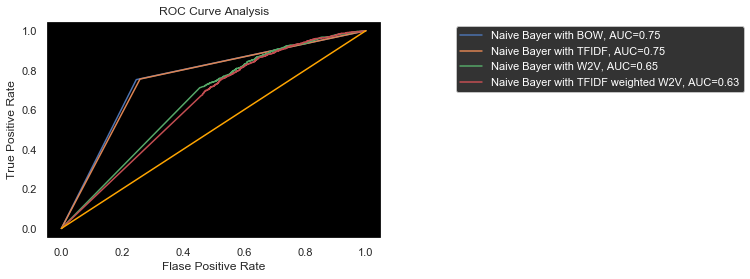

In [110]:
# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot
sns.set()
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.2f}".format(i, result_table.loc[i]['auc']))

#fig = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_facecolor('xkcd:black')
ax.grid(False)

plt.style.use("dark_background")
plt.plot([0,1], [0,1], color='orange')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Analysis')
plt.legend(bbox_to_anchor=(2.1, 1), loc='upper right')
plt.show()

## Best so far

**Observations:**

1.Recall score ---> BOW:0.75274, TFIDF:0.7556, Word2Vec:0.8061 , TFIDF weighted Word2Vec:0.78127.

2.BOW and TFIDF models are overfitting a lot

3.The Naive Bayes model with word2vec has given the best recall of 0.8061 so far.

4.Next We will try LSTM and compare results.